In [2]:

import fastai
print(fastai.__version__)

2.7.12


In [3]:
from fastai.vision.all import *

In [4]:
path=untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/home/codespace/.fastai/data/mnist_sample/labels.csv'),Path('/home/codespace/.fastai/data/mnist_sample/train'),Path('/home/codespace/.fastai/data/mnist_sample/valid')]

In [5]:
(path/'/home/codespace/.fastai/data/mnist_sample/train').ls()

(#2) [Path('/home/codespace/.fastai/data/mnist_sample/train/3'),Path('/home/codespace/.fastai/data/mnist_sample/train/7')]

In [6]:
threes=(path/'/home/codespace/.fastai/data/mnist_sample/train'/'3').ls().sorted()
threes

(#6131) [Path('/home/codespace/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
sevens=(path/'/home/codespace/.fastai/data/mnist_sample/train'/'7').ls().sorted()
sevens

(#6265) [Path('/home/codespace/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/codespace/.fastai/data/mnist_sample/train/7/10086.png')...]

In [8]:
img3_path=threes[1]
img3=Image.open(img3_path)
img3

In [9]:
array(img3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [10]:
tensor(img3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [11]:
img3_t=tensor(img3)
df=pd.DataFrame(im3_t[4:30,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

NameError: name 'im3_t' is not defined

In [ ]:
width,height=img3.size
print(width,height)

28 28


In [ ]:
three_tensors=[tensor(Image.open(o)) for o in threes]
seven_tensors=[tensor(Image.open(o)) for o in sevens]
print(len(three_tensors),len(seven_tensors))

6131 6265


In [ ]:
Image.open(threes[1])



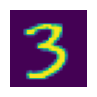

In [ ]:
#as the Images stored in tensor open three_tensors using show_image

show_image(three_tensors[1]);

In [ ]:
#stacked seven_tesnors using  

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [ ]:
# going to find length of stacked_threes   
len(stacked_sevens.shape)

3

In [ ]:
stacked_threes.ndim

3

<Axes: >

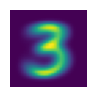

In [ ]:
mean3=stacked_threes.mean(axis=0)
show_image(mean3)

<Axes: >

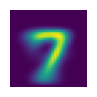

In [ ]:
mean7=stacked_sevens.mean(axis=0)
show_image(mean7)

<Axes: >

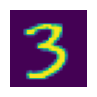

In [ ]:
a_3=stacked_threes[1]
show_image(a_3)

In [ ]:
dist_3_abs=abs(a_3-mean3).mean()
dist_3_sqrt=((a_3-mean3)**2).mean().sqrt()
dist_3_sqrt, dist_3_abs

(tensor(0.2021), tensor(0.1114))

<Axes: >

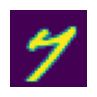

In [ ]:
a_7=stacked_sevens[1]
show_image(a_7)

In [ ]:
dist_7_abs=(a_7-mean7).abs().mean()
dist_7_sqrt=((a_7-mean7)**2).mean().sqrt()
dist_7_sqrt,dist_7_abs

(tensor(0.2585), tensor(0.1304))

In [ ]:
dis=(a_3-mean7).abs().mean()
dist=((a_3-mean7)**2).abs().mean().sqrt()
dis, dist

(tensor(0.1586), tensor(0.3021))